In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
file_path = r'C:\Users\T VIJAYA BALAJI\Desktop\projects\spotify_recommendation_system\spotify dataset.csv'  # Update this to file path
spotify_data = pd.read_csv(file_path)

In [5]:
# Data Preprocessing

# Handling missing values
spotify_data_cleaned = spotify_data.dropna()

# Convert 'track_album_release_date' to datetime format
#spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'])
spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'], errors='coerce')


C:\Users\T VIJAYA BALAJI\AppData\Local\Temp\ipykernel_13476\206230197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'], errors='coerce')


c:\Users\T VIJAYA BALAJI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


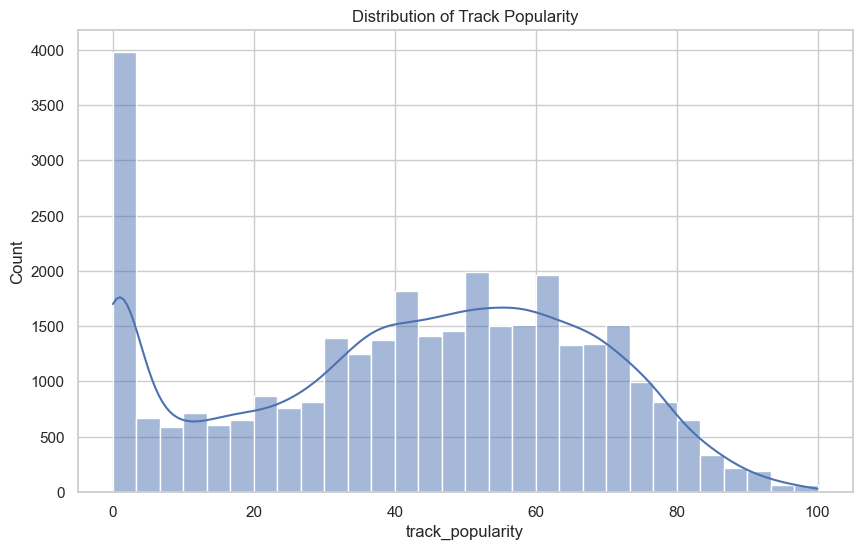

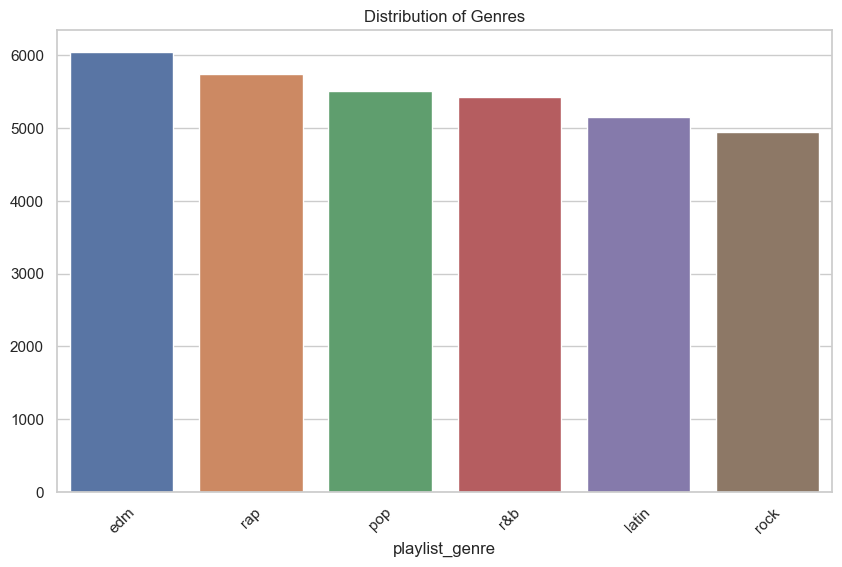

In [6]:
# Exploratory Data Analysis (EDA) and Visualization

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Track Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# Genre Distribution
plt.figure(figsize=(10, 6))
genre_counts = spotify_data_cleaned['playlist_genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

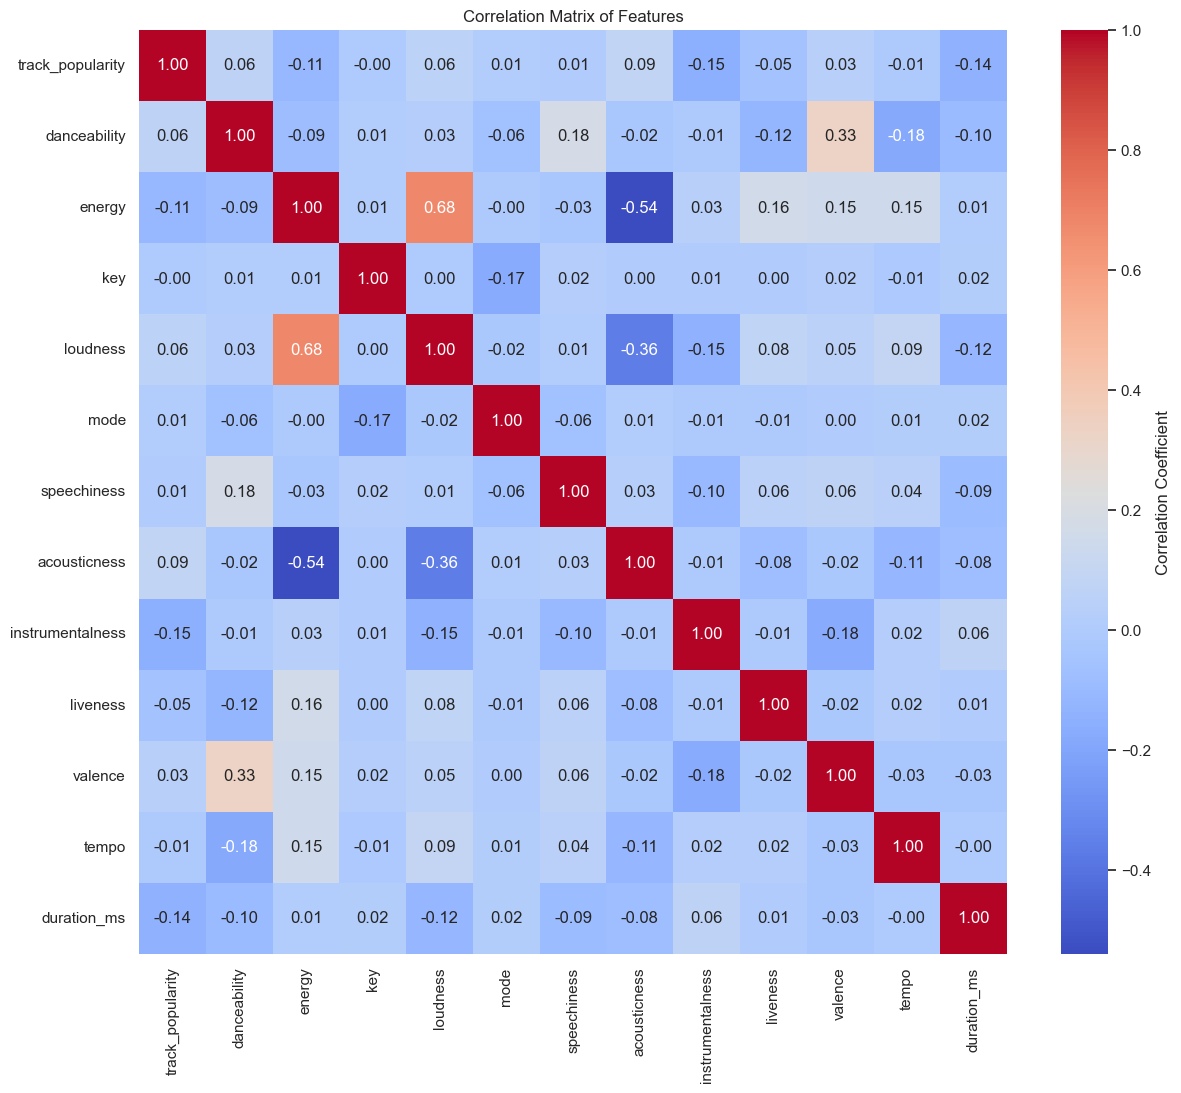

In [7]:
# Correlation Matrix of Features

# Calculate and plot the correlation matrix
corr_matrix = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

c:\Users\T VIJAYA BALAJI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\T VIJAYA BALAJI\AppData\Local\Temp\ipykernel_13476\845193809.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.labels_


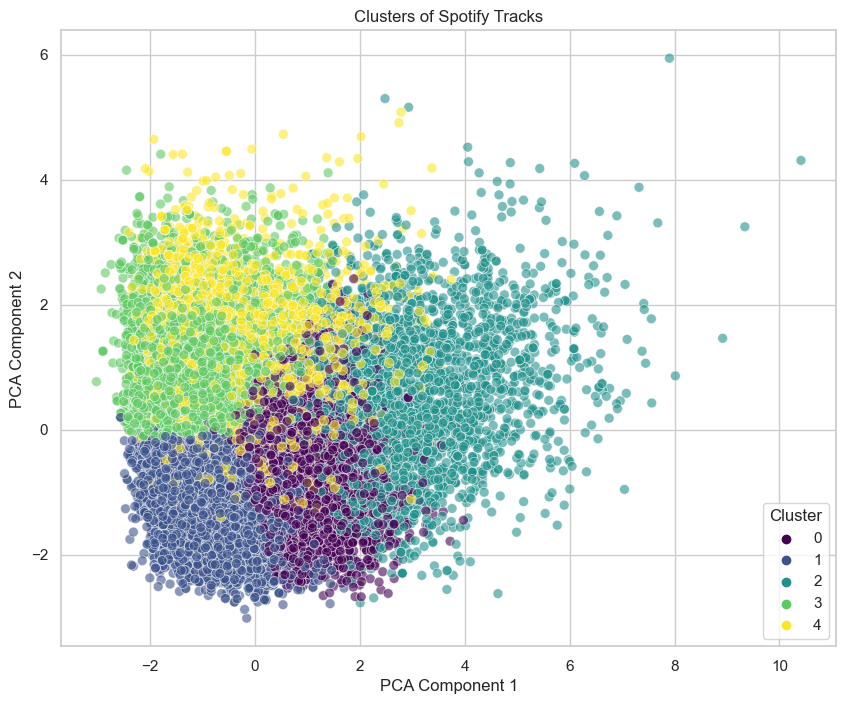

In [8]:
# Clustering

# Feature selection for clustering
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Number of clusters is chosen arbitrarily
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
spotify_data_cleaned['cluster'] = kmeans.labels_

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', data=spotify_data_cleaned, palette='viridis', s=50, alpha=0.6)
plt.title('Clusters of Spotify Tracks')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [9]:
# Features selected for clustering
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
spotify_data_cleaned['cluster'] = kmeans.labels_

# Recommendation function
def recommend_songs(song_id, spotify_data, num_recommendations=5):
    """
    Recommends songs from the same cluster as the input song.

    Parameters:
    - song_id: The ID of the song for which recommendations are sought.
    - spotify_data: The DataFrame containing the Spotify dataset with cluster labels.
    - num_recommendations: The number of recommendations to return.

    Returns:
    - A DataFrame containing the recommended songs.
    """
    if song_id not in spotify_data['track_id'].values:
        print("Song ID not found in the dataset.")
        return None

    # Find the cluster of the input song
    song_cluster = spotify_data[spotify_data['track_id'] == song_id]['cluster'].values[0]

    # Filter songs from the same cluster
    recommended_songs = spotify_data[spotify_data['cluster'] == song_cluster]

    # Remove the input song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_id'] != song_id]

    # Randomly select songs from the same cluster
    recommendations = recommended_songs.sample(n=num_recommendations)

    return recommendations[['track_id', 'track_name', 'track_artist', 'cluster']]

# Example usage
song_id_example = spotify_data_cleaned['track_id'].iloc[0]
recommendations = recommend_songs(song_id_example, spotify_data_cleaned, num_recommendations=5)
print(recommendations)

c:\Users\T VIJAYA BALAJI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                     track_id            track_name   track_artist  cluster
802    0weAUscowxeqDtpCgtbpgp  Gettin' Jiggy Wit It     Will Smith        1
28165  2h4QMolhE2puX7CYZyYOmn             Disappear   Rob Stepwart        1
21357  1zOA2VabBnP3ufAH1e5TQJ         Flow Violento       Arcangel        1
31478  3r7kx6SylBJsVrvTZ2qXuT               Runaway  Pierce Fulton        1
30646  6YUTL4dYpB9xZO5qExPf05                Summer  Calvin Harris        1


C:\Users\T VIJAYA BALAJI\AppData\Local\Temp\ipykernel_13476\3939651461.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.labels_
